# Binarization

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"

Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


## Import Data

In [2]:
pr <- readRDS("pr_year_season.rds")
# tmax <- readRDS("tmax_year_season.rds")

In [3]:
pr10 <- readRDS("../quantiles/pr10.rds")
# tmax90 <- readRDS("../quantiles/tmax90.rds")

In [27]:
pr50 <- readRDS("../quantiles/pr50.rds")

In [3]:
ls()

character(0)

## Binarization Function

In [21]:
str(pr)

List of 45
 $ 1971:List of 4
  ..$ Winter:List of 4
  .. ..$ Variable:List of 2
  .. .. ..$ varName: chr "pr"
  .. .. ..$ level  : NULL
  .. .. ..- attr(*, "use_dictionary")= logi FALSE
  .. .. ..- attr(*, "description")= chr "Precipitation amount"
  .. .. ..- attr(*, "units")= chr "kg m-2"
  .. .. ..- attr(*, "longname")= chr "pr"
  .. .. ..- attr(*, "daily_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "monthly_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "verification_time")= chr "none"
  .. .. ..- attr(*, "subset")= chr "time"
  .. ..$ Data    : num [1:59, 1:79, 1:137] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  .. .. ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
  .. ..$ xyCoords:List of 2
  .. .. ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  .. .. ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  .. .. ..- attr(*, "projection")= chr "LatLonProjection"
  .. .. ..- attr(*, "resX")= num 0.101
  .. .. ..- attr(*, "resY")= n

In [23]:
a <- (pr$`1995`$Spring$Data[2,70,3])
b <- (pr10$Spring$Data[1,70,3])
print(a)
print(b)


[1] 1.275764
[1] 0.00524847
[1] "a > b"


In [ ]:
dims <- dim(pr$`1995`$Spring$Data)
contador <- c()
print(dims)
for (i in 1:dims[1]){
    a <- (pr$`1995`$Spring$Data[i,70,3])
    b <- (pr10$Spring$Data[1,70,3])
    if (a > b){
        contador <- condador + 1
    }
}

In [25]:
print(a)
print(b)

[1] 1
[1] 0.00524847


In [24]:
if (a > b) {
  a <- 1
} else {
  a <- 0
}

In [13]:
for (year in names(pr)){
    for (season in names(pr[[year]])){
      season_data <-pr[[year]][[season]]
      season_quantile <- pr10[[season]]
      dims <- dim(season_data$Data)
      for (a in 1:dims[1]) {
          for (i in 1:dims[2]) {
            for (j in 1:dims[3]) {
              print(c(a,i,j))
            }
          }
      }
    }
    # print(year)
}

: 

In [11]:
binarization <- function(grid_data, quantile, variable) {
# Iterate over the years in the data grid
  for (year in names(grid_data)) {
    # Iterate over the seasons of each year
    for (season in names(grid_data[[year]])) {
      # Get current station data
      season_data <- grid_data[[year]][[season]]
      season_quantile <- quantile[[season]]
      
      # Dimension of the data
      dims <- dim(season_data$Data)
      # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j]) && !is.na(season_quantile$Data[1, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] <= season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[year]][[season]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

## Binarization (Numbers)

In [10]:
binarization_number <- function(grid_data, pr, tmax, variable) {
# Iterate over the years in the data grid
  for (year in names(grid_data)) {
    # Iterate over the seasons of each year
    for (season in names(grid_data[[year]])) {
      # Get current station data
      season_data <- grid_data[[year]][[season]]
      
      # Dimension of the data
      dims <- dim(season_data$Data)
      # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < pr) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > tmax) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[year]][[season]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

## Calculate

In [12]:
pr10bin <- binarization(pr, pr10, "pr")

In [6]:
tmax90bin <- binarization(tmax, tmax90, "tmax")

In [12]:
saveRDS(object = pr10bin, file = "pr10bin.rds", compress ="xz")

In [ ]:
saveRDS(object = tmax90bin, file = "tmax90bin.rds", compress ="xz")

In [6]:
# Create a function that iter over the years and seasons of one data grid and execute the function climatology to summarize the data
sum_events <- function(grid) {
  grid1 <- grid
  # Iterate over the years in the grid
  for (year in names(grid)) {
    # Iterate over the seasons in each year
    for (season in names(grid[[year]])) {
      # Get the data of the current season
      season_data1 <- grid[[year]][[season]]
      # Apply the function to the data
      sum_events <- climatology(season_data1, clim.fun = list(FUN = "sum", na.rm = FALSE))
      # sum_events <- gridArithmetics(sum_events, capa_tierra, operator = "*")
      # Update the data grid with the result
      grid1[[year]][[season]] <- sum_events
    }
  }
  # Return the updated grid
  return(grid1)
}

In [8]:
sumtmax90bin <- sum_events(tmax90bin)

[2024-03-06 13:45:13] - Computing climatology...
[2024-03-06 13:45:13] - Done.
[2024-03-06 13:45:13] - Computing climatology...
[2024-03-06 13:45:13] - Done.
[2024-03-06 13:45:13] - Computing climatology...
[2024-03-06 13:45:13] - Done.
[2024-03-06 13:45:13] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:14] - Done.
[2024-03-06 13:45:14] - Computing climatology...
[2024-03-06 13:45:15] - Done.
[2024-03-06 13:45:15] - Computing climatology...
[2024-03-06 13:45:15] - Done.
[2024-03-06 13:45:15] - Computing climatology...
[20

In [13]:
sumpr10 <- sum_events(pr10bin)

[2024-03-06 16:32:28] - Computing climatology...
[2024-03-06 16:32:28] - Done.
[2024-03-06 16:32:28] - Computing climatology...
[2024-03-06 16:32:29] - Done.
[2024-03-06 16:32:29] - Computing climatology...
[2024-03-06 16:32:29] - Done.
[2024-03-06 16:32:29] - Computing climatology...
[2024-03-06 16:32:29] - Done.
[2024-03-06 16:32:29] - Computing climatology...
[2024-03-06 16:32:29] - Done.
[2024-03-06 16:32:29] - Computing climatology...
[2024-03-06 16:32:29] - Done.
[2024-03-06 16:32:29] - Computing climatology...
[2024-03-06 16:32:30] - Done.
[2024-03-06 16:32:30] - Computing climatology...
[2024-03-06 16:32:30] - Done.
[2024-03-06 16:32:30] - Computing climatology...
[2024-03-06 16:32:30] - Done.
[2024-03-06 16:32:30] - Computing climatology...
[2024-03-06 16:32:31] - Done.
[2024-03-06 16:32:31] - Computing climatology...
[2024-03-06 16:32:31] - Done.
[2024-03-06 16:32:31] - Computing climatology...
[2024-03-06 16:32:31] - Done.
[2024-03-06 16:32:31] - Computing climatology...
[20

In [14]:
sumtmax90 <- sum_events(tmax90bin)

[2024-03-06 12:41:27] - Computing climatology...
[2024-03-06 12:41:28] - Done.
[2024-03-06 12:41:28] - Computing climatology...
[2024-03-06 12:41:28] - Done.
[2024-03-06 12:41:28] - Computing climatology...
[2024-03-06 12:41:29] - Done.
[2024-03-06 12:41:29] - Computing climatology...
[2024-03-06 12:41:29] - Done.
[2024-03-06 12:41:29] - Computing climatology...
[2024-03-06 12:41:30] - Done.
[2024-03-06 12:41:30] - Computing climatology...
[2024-03-06 12:41:30] - Done.
[2024-03-06 12:41:30] - Computing climatology...
[2024-03-06 12:41:30] - Done.
[2024-03-06 12:41:30] - Computing climatology...
[2024-03-06 12:41:30] - Done.
[2024-03-06 12:41:30] - Computing climatology...
[2024-03-06 12:41:30] - Done.
[2024-03-06 12:41:30] - Computing climatology...
[2024-03-06 12:41:31] - Done.
[2024-03-06 12:41:31] - Computing climatology...
[2024-03-06 12:41:31] - Done.
[2024-03-06 12:41:31] - Computing climatology...
[2024-03-06 12:41:31] - Done.
[2024-03-06 12:41:31] - Computing climatology...
[20

In [21]:
str(sumpr10)

List of 45
 $ 1971:List of 4
  ..$ Winter:List of 4
  .. ..$ Variable:List of 2
  .. .. ..$ varName: chr "pr"
  .. .. ..$ level  : NULL
  .. .. ..- attr(*, "use_dictionary")= logi FALSE
  .. .. ..- attr(*, "description")= chr "Precipitation amount"
  .. .. ..- attr(*, "units")= chr "kg m-2"
  .. .. ..- attr(*, "longname")= chr "pr"
  .. .. ..- attr(*, "daily_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "monthly_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "verification_time")= chr "none"
  .. .. ..- attr(*, "subset")= chr "time"
  .. ..$ Data    : num [1, 1:79, 1:137] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  .. .. ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
  .. .. ..- attr(*, "climatology:fun")= chr "sum"
  .. ..$ xyCoords:List of 2
  .. .. ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  .. .. ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  .. .. ..- attr(*, "projection")= chr "LatLonProjection"
  .. .. ..- attr(*, "r

In [8]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos, estacion) {
  # Extraemos los años disponibles en los datos
  years <- names(datos)
  
  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in years) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]][[estacion]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  # resultado <- do.call(bindGrid, c(lista_grids, list(dimension = "time", skip.temporal.check = TRUE)))
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

In [14]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
dataPeriod <- list()

# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumpr10, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  # datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  dataPeriod[[estacion]] <- datos_estacion
}

[2024-03-06 16:33:09] - Computing climatology...
[2024-03-06 16:33:09] - Done.
[2024-03-06 16:33:09] - Computing climatology...
[2024-03-06 16:33:09] - Done.
[2024-03-06 16:33:09] - Computing climatology...
[2024-03-06 16:33:09] - Done.
[2024-03-06 16:33:10] - Computing climatology...
[2024-03-06 16:33:11] - Done.


In [12]:
capa_tierra <- readRDS("../capa_tierra.rds")

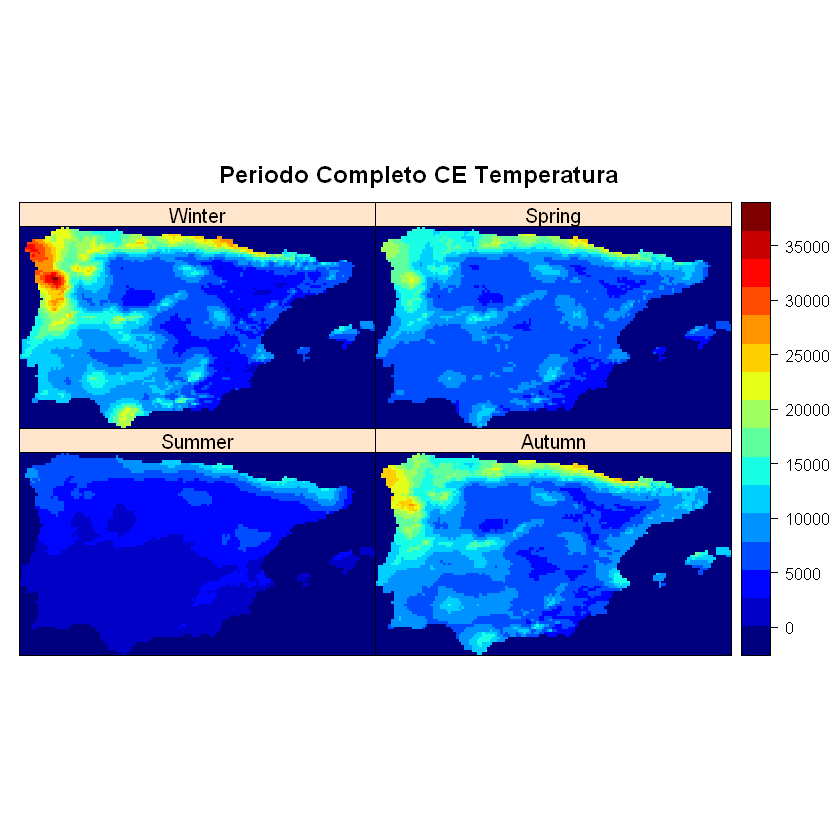

In [15]:
full <- bindGrid(dataPeriod$Winter, dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(full, as.table =TRUE, names.attr = c("Winter", "Spring", "Summer", "Autumn"), color.theme = "jet.colors",  main = "Periodo Completo CE Temperatura" )

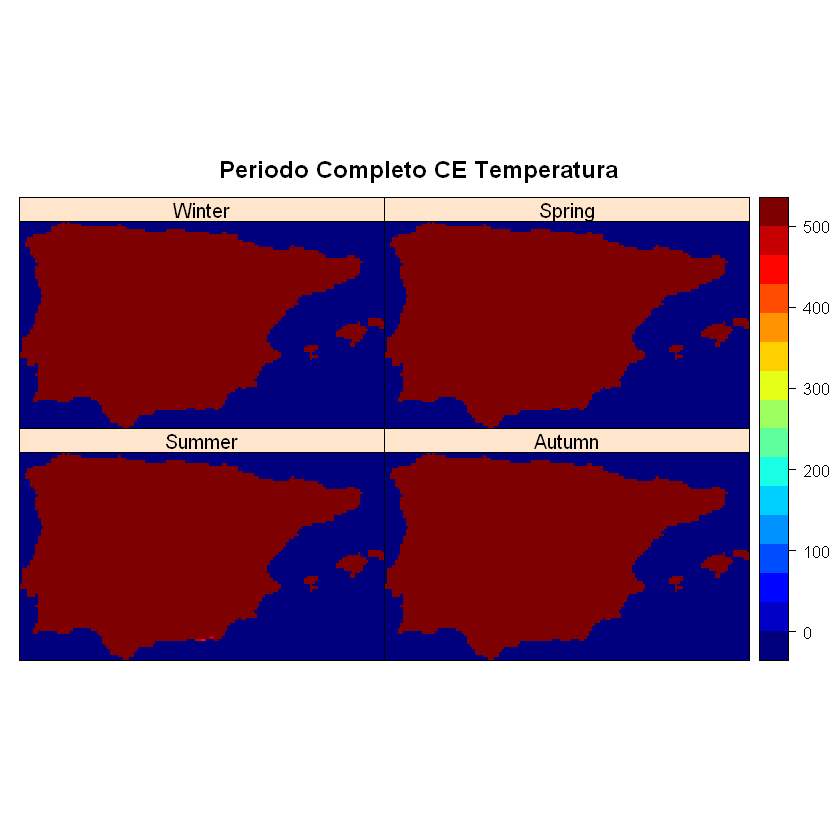

In [16]:
full <- bindGrid(dataPeriod$Winter, dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(full, as.table =TRUE, names.attr = c("Winter", "Spring", "Summer", "Autumn"), color.theme = "jet.colors",  main = "Periodo Completo CE Temperatura", set.max = 500 )

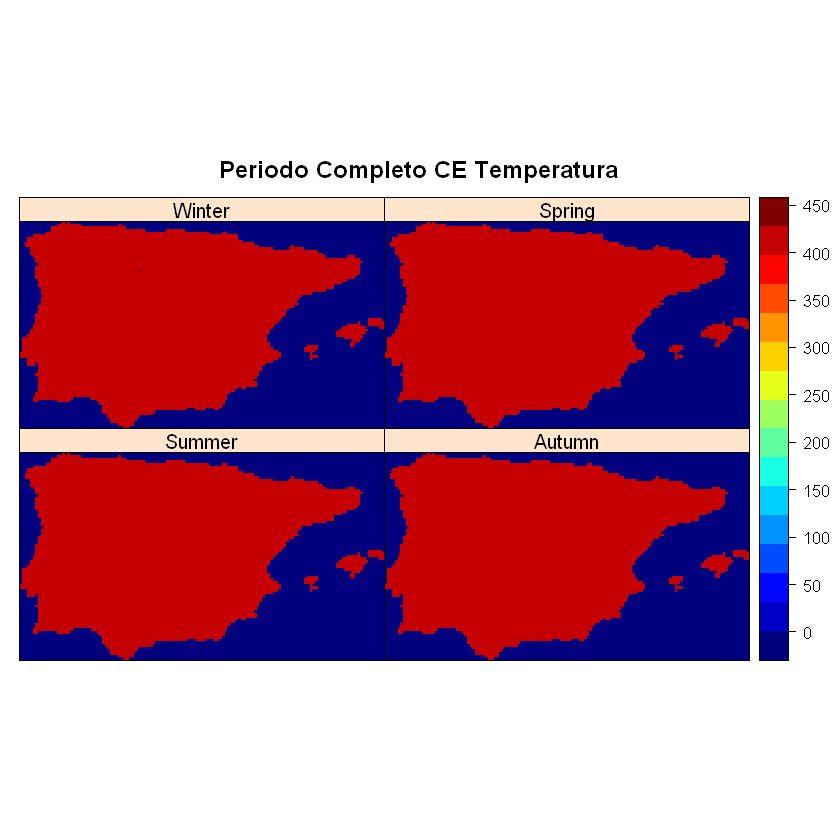

In [17]:
full <- bindGrid(dataPeriod$Winter, dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(full, as.table =TRUE, names.attr = c("Winter", "Spring", "Summer", "Autumn"), color.theme = "jet.colors",  main = "Periodo Completo CE Temperatura" )

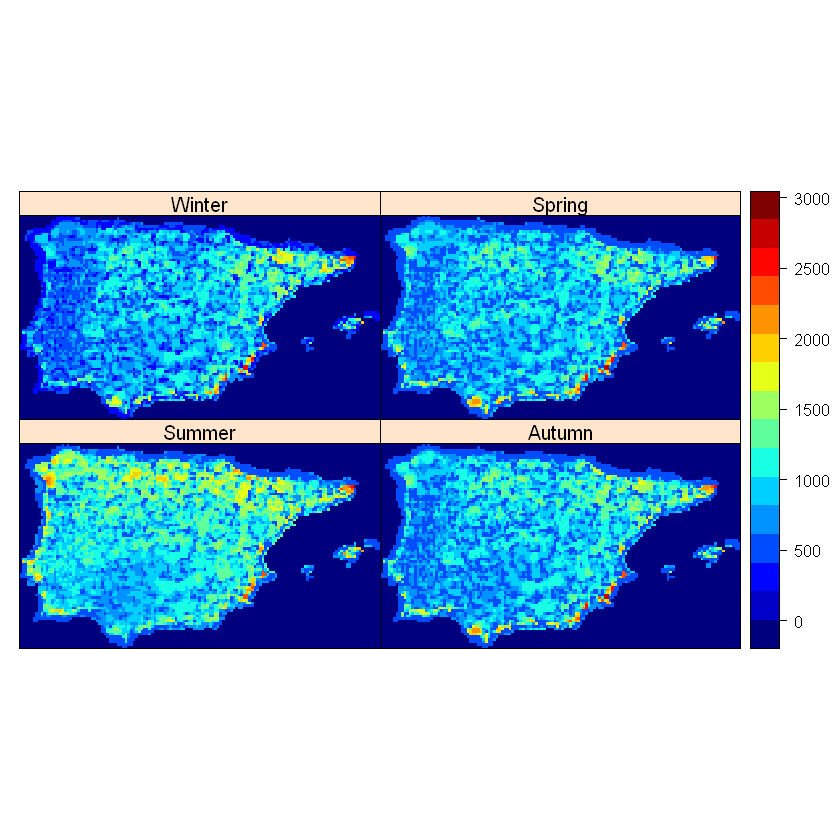

In [10]:
full <- bindGrid(dataPeriod$Winter, dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(full, as.table =TRUE, names.attr = c("Winter", "Spring", "Summer", "Autumn"), color.theme = "jet.colors", )

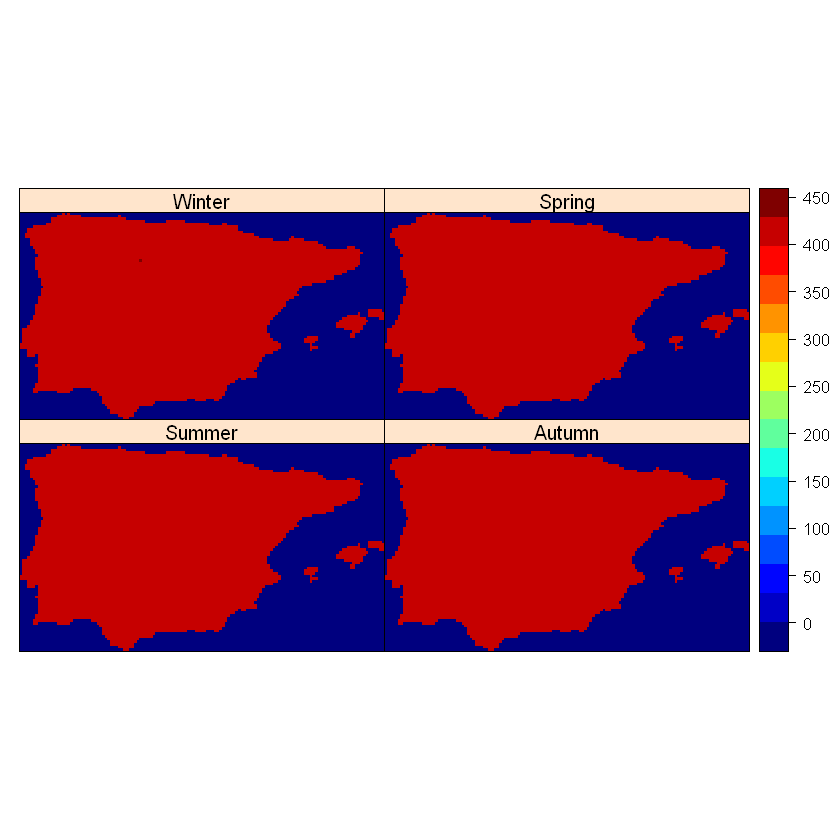

In [16]:
full <- bindGrid(dataPeriod$Winter, dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(full, as.table =TRUE, names.attr = c("Winter", "Spring", "Summer", "Autumn"), color.theme = "jet.colors")

In [15]:
pr_bin_10 <- binarization(pr, pr10, "pr")

In [16]:
saveRDS(pr_bin_10, file = "pr_bin_10.rds", compress = "xz")

In [17]:
tmax_bin_90 <- binarization(tmax, tmax90, "tmax")

In [18]:
saveRDS(tmax_bin_90, file = "tmax_bin_90.rds", compress = "xz")

### Done

In [4]:
tmax_bin_30 <- binarization_number(tmax, 0.1, 30, "tmax")

In [5]:
saveRDS(tmax_bin_30, "tmax_bin_30.rds", compress = 'xz')

In [22]:
pr_bin_0.1 <- binarization_number(pr, 0.1, 30, "pr")

In [23]:
saveRDS(pr_bin_0.1, "pr_bin_0.1.rds", compress = 'xz')